# Chess Board

In [12]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Create Board

In [13]:
class Board:

    red = [1,.2,0]
    blue = [0,1,1]  # RGB model for colors

    def __init__(self): 
        self.grid = np.ones((8,8,3))  # uses numpy ones method
        for coords in np.ndindex(8,8): # creates rows and columns
            row = coords[0]
            col = coords[1]
            if row % 2 != col % 2:
                # turn every other to black, in a jagged way
                self.grid[row, col] = [0,0,0]

    def add_red(self, row, col):
        self.grid[row][col] = self.red

    def add_blue(self, row, col):
        self.grid[row][col] = self.blue

    def render(self):
        plt.imshow(self.grid)

    def under_attack(self):
        red_coords = None
        blue_coords = None
 
        for i,row in enumerate(self.grid):
            for j,col in enumerate(row):
                if np.array_equal(col,self.blue):
                    blue_coords = (i,j)
                if np.array_equal(col,self.red):
                    red_coords = (i,j)
    
        if not blue_coords or not red_coords:
            return False
        
        # check for same horizontal or vertical coordinates
        if blue_coords[0] == red_coords[0] or blue_coords[1] == red_coords[1]:
            return True

        # check diagonals
        dx = abs(blue_coords[0] - red_coords[0])
        dy = abs(blue_coords[1] - red_coords[1])

        return dx == dy


## Example board

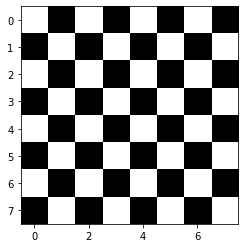

In [14]:
board = Board()
board.render()

Board with "pieces"

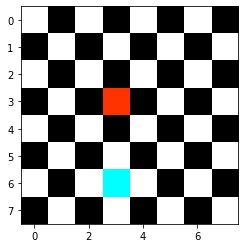

In [15]:
board = Board()
board.add_red(3,3)
board.add_blue(6,3)
board.render()

## Determine if red or blue under attack

### Same row

****** Under attack **********


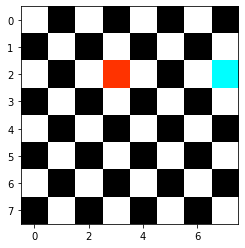

In [16]:
# same row
board = Board()
board.add_red(2,3)
board.add_blue(2,7)

board.render()

assert board.under_attack()
print('****** Under attack **********')

### Same column

****** Under attack **********


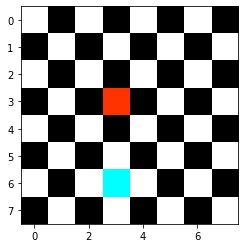

In [8]:
# same column
board = Board()
board.add_red(3,3)
board.add_blue(6,3)
board.render()
assert board.under_attack()
print('****** Under attack **********')

### Diagonal

****** Under attack **********


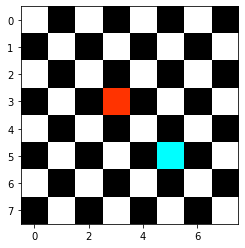

In [9]:
# diagonal
board = Board()
board.add_red(3,3)
board.add_blue(5,5)
board.render()
assert board.under_attack()
print('****** Under attack **********')

### Diagonal flipped

****** Under attack **********


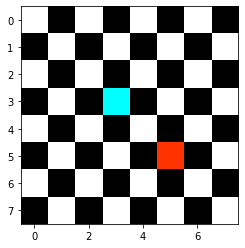

In [10]:
# diagonal flipped
board = Board()
board.add_red(5,5)
board.add_blue(3,3)
board.render()
assert board.under_attack()
print('****** Under attack **********')

### Not under attack

****** NOT Under attack **********


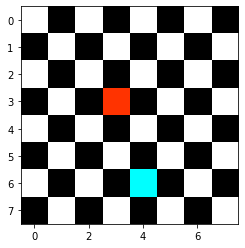

In [17]:
# not under attack
board = Board()
board.add_red(3,3)
board.add_blue(6,4)
board.render()
assert not board.under_attack()
print('****** NOT Under attack **********')